### Used Car prices in India

#### Importing relevant libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error

### Reading the dataset into Python Environment

In [3]:
dataset = pd.read_csv('cardekho_updated.csv')
dataset.head(5)

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [4]:
dataset.tail(2)

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
19972,Mahindra XUV500 W6 2WD,12.25 Lakh*,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016,Dealer,"38,00,000 kms",First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7
19973,Honda City i-VTEC CVT VX,12 Lakh*,NaN,2019,Dealer,"13,000 kms",First Owner,Petrol,Automatic,Mileage18.0 kmpl,Engine1497 CC,Max Power117.6 bhp,Seats5


#### 2. Checking the basic details of the dataset:

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  object
 2   new_price          9564 non-null   object
 3   year               19974 non-null  int64 
 4   seller_type        19974 non-null  object
 5   km_driven          19974 non-null  object
 6   owner_type         19974 non-null  object
 7   fuel_type          19974 non-null  object
 8   transmission_type  19974 non-null  object
 9   mileage            19814 non-null  object
 10  engine             19864 non-null  object
 11  max_power          19637 non-null  object
 12  seats              19887 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


In [6]:
dataset.describe(include = 'all')

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
count,19974,19974,9564,19974.000000,19974,19974,19974,19974,19974,19814,19864,19637,19887
unique,3321,1215,1744,NaN,3,4515,1,5,2,561,169,493,9
top,Maruti Swift Dzire VDI,4.5 Lakh*,New Car (On-Road Price) : Rs.12.68-16.80 Lakh*,NaN,Dealer,"50,000 kms",First Owner,Diesel,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power74 bhp,Seats5
freq,210,466,144,NaN,11970,750,19974,9815,16025,624,2662,867,16585
mean,NaN,NaN,NaN,2014.526134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.248791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dataset.columns

Index(['full_name', 'selling_price', 'new_price', 'year', 'seller_type',
       'km_driven', 'owner_type', 'fuel_type', 'transmission_type', 'mileage',
       'engine', 'max_power', 'seats'],
      dtype='object')

In [8]:
dataset.shape

(19974, 13)

In [9]:
dataset['full_name'].unique()

array(['Maruti Alto Std', 'Hyundai Grand i10 Asta', 'Hyundai i20 Asta',
       ..., 'Tata Safari 2005-2017 DICOR 2.2 GX 4x2',
       'Ford Ecosport 2015-2021 Signature Edition Petrol BSIV',
       'Toyota Yaris V Optional CVT BSIV'], dtype=object)

#### Insights:
          There are 19974 rows and 13 columns/features of different datatypes present in the dataset.
          

#### 3. Checking the missing values in the dataset

In [10]:
dataset.isna().sum()

full_name                0
selling_price            0
new_price            10410
year                     0
seller_type              0
km_driven                0
owner_type               0
fuel_type                0
transmission_type        0
mileage                160
engine                 110
max_power              337
seats                   87
dtype: int64

#### Insights:
        There are missing values in the features of new_price, mileage, engine, max_power and seats.

## Preprocessing steps to be taken:

In [11]:
dataset.dtypes

full_name            object
selling_price        object
new_price            object
year                  int64
seller_type          object
km_driven            object
owner_type           object
fuel_type            object
transmission_type    object
mileage              object
engine               object
max_power            object
seats                object
dtype: object

### 1. Filling the missing values in the dataset.

In [12]:
obj_cols = list(dataset.select_dtypes('object').columns)
for o in obj_cols:
    dataset[o].fillna("NULL",inplace = True)

In [13]:
dataset.isna().sum()

full_name            0
selling_price        0
new_price            0
year                 0
seller_type          0
km_driven            0
owner_type           0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
dtype: int64

#### Insights:
           There are no more missing values in the dataset after filing the missing values. 

### 2. Outlier Detection and Handling:

##### a. Checking the Outliers in the dataset:

Inorder to check the outliers, we need to plot boxplot of the features using percentiles.

(array([1]), [Text(1, 0, 'year')])

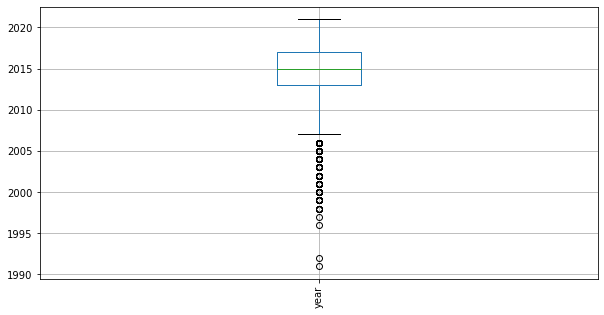

In [14]:
plt.figure(figsize=(10,5))
dataset.boxplot()
plt.xticks(rotation=90)

In [15]:
dataset.corr()

,year
year,1.0


#### b. Handling the outliers in  'year'  :

In [16]:
Q1=np.percentile(dataset['year'], 25, interpolation = 'midpoint')
Q2=np.percentile(dataset['year'], 50, interpolation = 'midpoint')
Q3=np.percentile(dataset['year'], 75, interpolation = 'midpoint')
print("Q1 is : ", Q1)
print("Q2 is : ",Q2)
print("Q3 is : ",Q3)

Q1 is :  2013.0
Q2 is :  2015.0
Q3 is :  2017.0


In [17]:
dataset['year'].median()

2015.0

In [18]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR


print("IQR is : ",IQR)
print("Lower Limit is :",round(low_lim))
print("Upper limit is: ",round(up_lim))

IQR is :  4.0
Lower Limit is : 2007
Upper limit is:  2023


In [19]:
##dataset[(dataset['year'] > 2023) ^ (dataset['year'] < 2007)]



In [20]:
outlier=[]
for x in dataset['year']:
    if((x>up_lim) or(x<low_lim)):
        outlier.append(x)
outlier

[2004,
 2006,
 2006,
 2000,
 2004,
 2005,
 2005,
 2005,
 2006,
 2005,
 2002,
 2000,
 2005,
 2006,
 2005,
 2004,
 1999,
 2006,
 2005,
 2006,
 2005,
 2003,
 1997,
 2004,
 2003,
 2005,
 2003,
 2006,
 2006,
 2005,
 2006,
 2004,
 2005,
 2003,
 2006,
 2004,
 2006,
 2006,
 2006,
 2006,
 2006,
 2006,
 2004,
 2005,
 1999,
 2006,
 2002,
 2000,
 1999,
 2005,
 2001,
 2006,
 2003,
 2003,
 2004,
 2001,
 1999,
 2006,
 2005,
 2001,
 2006,
 2003,
 2006,
 2006,
 2006,
 1992,
 2006,
 2001,
 2005,
 2005,
 2006,
 2006,
 2006,
 2006,
 2005,
 2005,
 2002,
 2006,
 2004,
 2003,
 2006,
 2005,
 2004,
 2003,
 2006,
 2006,
 2005,
 2004,
 2006,
 2006,
 2006,
 2006,
 2002,
 2004,
 2004,
 2005,
 2006,
 2006,
 2001,
 2006,
 2006,
 2000,
 2004,
 2006,
 2005,
 2006,
 2000,
 2002,
 1999,
 1999,
 2005,
 2002,
 2003,
 2003,
 2006,
 2005,
 2005,
 2005,
 2003,
 2005,
 2006,
 2006,
 2006,
 2004,
 2006,
 1999,
 2006,
 2005,
 2004,
 2006,
 2006,
 2006,
 2006,
 2005,
 2005,
 2006,
 2006,
 2003,
 2006,
 2006,
 2001,
 2005,
 2004,

In [21]:
dataset['year']=np.where(dataset['year']>up_lim,up_lim,np.where(dataset['year']<low_lim,low_lim,dataset['year']))
dataset

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NULL,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NULL,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NULL,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios 1.4 GXD,6.5 Lakh*,NULL,2017.0,Dealer,"69,480 kms",First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5
19970,Maruti Ertiga BSIV VXI,9.25 Lakh*,NULL,2019.0,Dealer,"18,000 kms",First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7
19971,Skoda Rapid 1.5 TDI Elegance,4.25 Lakh*,NULL,2015.0,Dealer,"67,000 kms",First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5
19972,Mahindra XUV500 W6 2WD,12.25 Lakh*,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016.0,Dealer,"38,00,000 kms",First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7


Text(0.5, 1.0, 'Box plot of year')

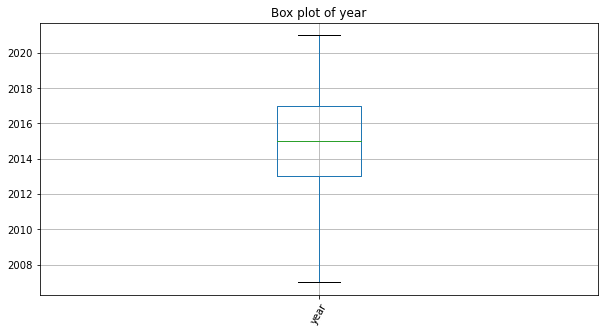

In [22]:
plt.figure(figsize=(10,5))
dataset.boxplot()
plt.xticks(rotation=60)
plt.title('Box plot of year')

####  Outlier has been detected in 'year' and it has been handled using percentiles. 
        

#### Creating a new feature named "Company" by replacing "full_name"

In [23]:
#dataset.rename(columns={'full_name': 'Company'}, inplace = True )
#dataset.head(5)

dataset['Company'] = dataset['full_name'].str.split(' ', expand=True)[0]

dataset['brand']=dataset.full_name.str.split(' ').str.get(1)
dataset

,full_name,selling_price,new_price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Company,brand
0,Maruti Alto Std,1.2 Lakh*,NULL,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,Maruti,Alto
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,Hyundai,Grand
2,Hyundai i20 Asta,2.15 Lakh*,NULL,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,Hyundai,i20
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NULL,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,Maruti,Alto
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,Ford,Ecosport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,Toyota Platinum Etios 1.4 GXD,6.5 Lakh*,NULL,2017.0,Dealer,"69,480 kms",First Owner,Diesel,Manual,Mileage23.59 kmpl,Engine1364 CC,Max Power67.05 bhp,Seats5,Toyota,Platinum
19970,Maruti Ertiga BSIV VXI,9.25 Lakh*,NULL,2019.0,Dealer,"18,000 kms",First Owner,Petrol,Manual,Mileage17.5 kmpl,Engine1373 CC,Max Power91.1 bhp,Seats7,Maruti,Ertiga
19971,Skoda Rapid 1.5 TDI Elegance,4.25 Lakh*,NULL,2015.0,Dealer,"67,000 kms",First Owner,Diesel,Manual,Mileage21.14 kmpl,Engine1498 CC,Max Power103.52 bhp,Seats5,Skoda,Rapid
19972,Mahindra XUV500 W6 2WD,12.25 Lakh*,New Car (On-Road Price) : Rs.17.83-24.91 Lakh*,2016.0,Dealer,"38,00,000 kms",First Owner,Diesel,Manual,Mileage16.0 kmpl,Engine2179 CC,Max Power140 bhp,Seats7,Mahindra,XUV500


In [24]:
dataset.drop(columns=['full_name'], axis=1, inplace=True)


##### Creating a new feature vehicle_age from year

In [25]:
dataset_year=2021
dataset['vehicle_age'] = dataset_year - dataset['year']
dataset.drop(['year'],axis=1, inplace=True)


dataset.head(2)


,selling_price,new_price,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,Company,brand,vehicle_age
0,1.2 Lakh*,NULL,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,Maruti,Alto,9.0
1,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,Hyundai,Grand,5.0


In [26]:
col_order=['Company', 'brand','vehicle_age','km_driven','seller_type','fuel_type','transmission_type','mileage','engine','max_power','seats','selling_price']
dataset=dataset[col_order]
dataset.head()

,Company,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9.0,"1,20,000 kms",Individual,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,1.2 Lakh*
1,Hyundai,Grand,5.0,"20,000 kms",Individual,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,5.5 Lakh*
2,Hyundai,i20,11.0,"60,000 kms",Individual,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,2.15 Lakh*
3,Maruti,Alto,9.0,"37,000 kms",Individual,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,2.26 Lakh*
4,Ford,Ecosport,6.0,"30,000 kms",Dealer,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,5.7 Lakh*


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            19974 non-null  object 
 1   brand              19974 non-null  object 
 2   vehicle_age        19974 non-null  float64
 3   km_driven          19974 non-null  object 
 4   seller_type        19974 non-null  object 
 5   fuel_type          19974 non-null  object 
 6   transmission_type  19974 non-null  object 
 7   mileage            19974 non-null  object 
 8   engine             19974 non-null  object 
 9   max_power          19974 non-null  object 
 10  seats              19974 non-null  object 
 11  selling_price      19974 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.8+ MB


In [28]:
dataset.head(5)

,Company,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9.0,"1,20,000 kms",Individual,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5,1.2 Lakh*
1,Hyundai,Grand,5.0,"20,000 kms",Individual,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5,5.5 Lakh*
2,Hyundai,i20,11.0,"60,000 kms",Individual,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5,2.15 Lakh*
3,Maruti,Alto,9.0,"37,000 kms",Individual,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5,2.26 Lakh*
4,Ford,Ecosport,6.0,"30,000 kms",Dealer,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5,5.7 Lakh*


In [29]:
dataset.shape

(19974, 12)

### 2. Label Encoding

###### Label Encoding
        Converting the labels into numeric form for the ease of Machine Learning models. Here all the features are of object type, so we need to change those into numerical values using encoding.

In [30]:
dataset.dtypes

Company               object
brand                 object
vehicle_age          float64
km_driven             object
seller_type           object
fuel_type             object
transmission_type     object
mileage               object
engine                object
max_power             object
seats                 object
selling_price         object
dtype: object

In [31]:
#obj_cols = dataset.select_dtypes(include ='object').columns

#for each in obj_cols:
    #print(dataset[each].value_counts())

In [32]:
dataset.columns

Index(['Company', 'brand', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'selling_price'],
      dtype='object')

In [33]:
## Loading Label Encoder function

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

dataset.Company = le.fit_transform(dataset.Company)
dataset.brand = le.fit_transform(dataset.brand)
dataset.selling_price = le.fit_transform(dataset.selling_price)
#dataset.new_price = le.fit_transform(dataset.new_price)
dataset.seller_type = le.fit_transform(dataset.seller_type)
dataset.fuel_type = le.fit_transform(dataset.fuel_type)
dataset.transmission_type = le.fit_transform(dataset.transmission_type)
dataset.engine = le.fit_transform(dataset.engine)
dataset.max_power = le.fit_transform(dataset.max_power)
dataset.seats = le.fit_transform(dataset.seats)
dataset.mileage = le.fit_transform(dataset.mileage)
dataset.km_driven = le.fit_transform(dataset.km_driven)
#dataset.owner_type = le.fit_transform(dataset.owner_type)


dataset


,Company,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,24,20,9.0,167,1,4,1,359,159,316,5,17
1,13,113,5.0,874,1,4,1,322,12,424,5,828
2,13,271,11.0,3099,1,4,1,238,12,417,5,348
3,24,20,9.0,1756,1,4,1,404,167,377,5,359
4,11,80,6.0,1383,0,1,1,456,43,482,5,844
...,...,...,...,...,...,...,...,...,...,...,...,...
19969,39,171,4.0,3561,0,1,1,472,23,375,5,942
19970,24,85,2.0,721,0,4,1,263,25,461,7,1163
19971,37,184,6.0,3448,0,1,1,414,43,14,5,678
19972,23,259,5.0,1812,0,1,1,200,82,96,7,157


In [34]:
dataset.dtypes

Company                int32
brand                  int32
vehicle_age          float64
km_driven              int32
seller_type            int32
fuel_type              int32
transmission_type      int32
mileage                int32
engine                 int32
max_power              int32
seats                  int32
selling_price          int32
dtype: object

In [35]:
data=pd.DataFrame(dataset.groupby("Company")['selling_price'].median())
data.reset_index()

,Company,selling_price
0,0,200.5
1,1,303.5
2,2,482.0
3,3,619.5
4,4,380.5
5,5,494.5
6,6,439.5
7,7,503.0
8,8,590.0
9,9,503.0


In [36]:
data.shape

(42, 1)

In [37]:
data = dataset.merge(data, on='Company', how='left')
data.head()

,Company,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price_x,selling_price_y
0,24,20,9.0,167,1,4,1,359,159,316,5,17,700.0
1,13,113,5.0,874,1,4,1,322,12,424,5,828,692.0
2,13,271,11.0,3099,1,4,1,238,12,417,5,348,692.0
3,24,20,9.0,1756,1,4,1,404,167,377,5,359,700.0
4,11,80,6.0,1383,0,1,1,456,43,482,5,844,726.0


In [38]:
dataset['Annualselling_price']= data['selling_price_y']
dataset.head(3)

,Company,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,Annualselling_price
0,24,20,9.0,167,1,4,1,359,159,316,5,17,700.0
1,13,113,5.0,874,1,4,1,322,12,424,5,828,692.0
2,13,271,11.0,3099,1,4,1,238,12,417,5,348,692.0


In [39]:
## Now we have 19974 rows and 14 columns in the dataset after feature engineering. 
dataset.shape

(19974, 13)

#### Dropping unwanted columns in the dataset:



In [40]:
dataset.drop(columns=['seller_type'], axis=1, inplace=True)
dataset.head()

,Company,brand,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,Annualselling_price
0,24,20,9.0,167,4,1,359,159,316,5,17,700.0
1,13,113,5.0,874,4,1,322,12,424,5,828,692.0
2,13,271,11.0,3099,4,1,238,12,417,5,348,692.0
3,24,20,9.0,1756,4,1,404,167,377,5,359,700.0
4,11,80,6.0,1383,1,1,456,43,482,5,844,726.0


In [41]:
dataset.describe()

,Company,brand,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,Annualselling_price
count,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000
mean,21.680785,145.048914,6.424001,2221.173075,2.457845,0.802293,330.059477,58.165365,303.543156,5.284770,641.980475,663.303294
std,10.593036,84.295911,3.092639,1316.326937,1.517765,0.398280,137.330829,53.195586,159.669664,0.896714,317.605501,118.375136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000
25%,13.000000,70.000000,4.000000,1120.000000,1.000000,1.000000,238.000000,14.000000,147.000000,5.000000,402.000000,580.000000
50%,24.000000,132.000000,6.000000,2268.000000,1.000000,1.000000,342.000000,42.000000,377.000000,5.000000,674.000000,700.000000
75%,24.000000,218.000000,8.000000,3344.000000,4.000000,1.000000,451.000000,82.000000,424.000000,5.000000,906.000000,700.000000
max,41.000000,273.000000,14.000000,4514.000000,4.000000,1.000000,561.000000,169.000000,493.000000,9.000000,1214.000000,980.000000


In [42]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Company,19974.0,21.680785,10.593036,0.0,13.0,24.0,24.0,41.0
brand,19974.0,145.048914,84.295911,0.0,70.0,132.0,218.0,273.0
vehicle_age,19974.0,6.424001,3.092639,0.0,4.0,6.0,8.0,14.0
km_driven,19974.0,2221.173075,1316.326937,0.0,1120.0,2268.0,3344.0,4514.0
fuel_type,19974.0,2.457845,1.517765,0.0,1.0,1.0,4.0,4.0
transmission_type,19974.0,0.802293,0.398280,0.0,1.0,1.0,1.0,1.0
mileage,19974.0,330.059477,137.330829,0.0,238.0,342.0,451.0,561.0
engine,19974.0,58.165365,53.195586,0.0,14.0,42.0,82.0,169.0
max_power,19974.0,303.543156,159.669664,0.0,147.0,377.0,424.0,493.0
seats,19974.0,5.284770,0.896714,0.0,5.0,5.0,5.0,9.0


In [43]:
## Prediction Target


dataset['Prediction'] = np.where(data[[ 'km_driven', 'mileage', 'max_power', 'seats', 'engine',
       'transmission_type', 'fuel_type']].sum(axis=1)>dataset['Annualselling_price'], 1, 0)

dataset

,Company,brand,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,Annualselling_price,Prediction
0,24,20,9.0,167,4,1,359,159,316,5,17,700.0,1
1,13,113,5.0,874,4,1,322,12,424,5,828,692.0,1
2,13,271,11.0,3099,4,1,238,12,417,5,348,692.0,1
3,24,20,9.0,1756,4,1,404,167,377,5,359,700.0,1
4,11,80,6.0,1383,1,1,456,43,482,5,844,726.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,39,171,4.0,3561,1,1,472,23,375,5,942,498.0,1
19970,24,85,2.0,721,4,1,263,25,461,7,1163,700.0,1
19971,37,184,6.0,3448,1,1,414,43,14,5,678,692.0,1
19972,23,259,5.0,1812,1,1,200,82,96,7,157,795.0,1


In [44]:
dataset.describe(include='all')

,Company,brand,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,Annualselling_price,Prediction
count,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000,19974.000000
mean,21.680785,145.048914,6.424001,2221.173075,2.457845,0.802293,330.059477,58.165365,303.543156,5.284770,641.980475,663.303294,0.965555
std,10.593036,84.295911,3.092639,1316.326937,1.517765,0.398280,137.330829,53.195586,159.669664,0.896714,317.605501,118.375136,0.182373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.000000
25%,13.000000,70.000000,4.000000,1120.000000,1.000000,1.000000,238.000000,14.000000,147.000000,5.000000,402.000000,580.000000,1.000000
50%,24.000000,132.000000,6.000000,2268.000000,1.000000,1.000000,342.000000,42.000000,377.000000,5.000000,674.000000,700.000000,1.000000
75%,24.000000,218.000000,8.000000,3344.000000,4.000000,1.000000,451.000000,82.000000,424.000000,5.000000,906.000000,700.000000,1.000000
max,41.000000,273.000000,14.000000,4514.000000,4.000000,1.000000,561.000000,169.000000,493.000000,9.000000,1214.000000,980.000000,1.000000


In [45]:
dataset.shape

(19974, 13)

### Data Modelling

###### Splitting of Data

In [46]:
X=dataset.drop(['Prediction'],axis=1)
y=dataset['Prediction']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.20)

In [48]:
X_train.shape

(15979, 12)

In [49]:
y_train.shape

(15979,)

In [50]:
X_test.shape

(3995, 12)

In [51]:
y_test.shape

(3995,)

### To find out the best classification model which is accurate :
            Some of the famous classification models are :
            
                    1. Logistic Regression Model
                    2. K-Nearest Neighbor(KNN) Model
                    3. Random Forest Model
                    4. Decision Tree Model
                    5. Support Vector Machine (SVM) Model
                    6. Gradient Boosting 
        

#### 1. Logistic Regression Model: 

In [52]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

In [53]:
print('Accuracy of Logistic Regression model is :',accuracy_score(y_test,y_pred)*100)
print("Precision is :",precision_score(y_test,y_pred,average='weighted'))
print("Recall is : ",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is :",f1_score(y_test,y_pred,average='weighted'))

Accuracy of Logistic Regression model is : 99.94993742177722
Precision is : 0.9994993742177722
Recall is :  0.9994993742177722
F1 Score is : 0.9994993742177722


In [54]:
confusion_matrix(y_test,y_pred)

array([[ 128,    1],
       [   1, 3865]], dtype=int64)

#### 2. K- Nearest Neighbors (KNN) Model:

In [55]:
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [56]:
print('The accuracy of KNN model is : ', accuracy_score(prediction,y_test)*100)
print("Precision is : ",precision_score(prediction,y_test,average = 'weighted'))
print("Recall is : ",recall_score(prediction,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(prediction,y_test,average ='weighted'))

The accuracy of KNN model is :  99.3241551939925
Precision is :  0.9931746108061273
Recall is :  0.9932415519399249
F1 Score is :  0.9932040219252521


In [57]:
confusion_matrix(prediction,y_test)

array([[ 117,   15],
       [  12, 3851]], dtype=int64)

#### 3. Random Forest Model

In [58]:
rnf = RandomForestClassifier(n_estimators=100)
rnf_model = rnf.fit(X_train, y_train)
rnf_predict = rnf_model.predict(X_test)

In [59]:
rnf.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
rnf_predict=rnf.predict(X_test)


In [61]:
print('Accuracy of Random Forest model is : ',accuracy_score(rnf_predict, y_test) *100)
print("Precision is : ",precision_score(rnf_predict,y_test,average = 'weighted'))
print("Recall is : ",recall_score(rnf_predict,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(rnf_predict,y_test,average ='weighted'))

Accuracy of Random Forest model is :  99.57446808510639
Precision is :  0.9958494609838633
Recall is :  0.9957446808510638
F1 Score is :  0.9957853544692236


In [62]:
confusion_matrix(y_test,rnf_predict)

array([[ 118,   11],
       [   6, 3860]], dtype=int64)

#### 4. Decision Tree Model:

In [63]:
dtree = DecisionTreeClassifier()
dtree_model = dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

In [64]:
print('Accuracy of Decision Tree model is : ', accuracy_score(dtree_predict, y_test)*100)
print("Precision is : ",precision_score(dtree_predict,y_test,average = 'weighted'))
print("Recall is : ",recall_score(dtree_predict,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(dtree_predict,y_test,average ='weighted'))

Accuracy of Decision Tree model is :  99.37421777221527
Precision is :  0.9936808635766133
Recall is :  0.9937421777221527
F1 Score is :  0.9937074277085668


In [65]:
confusion_matrix(y_test,dtree_predict)

array([[ 118,   11],
       [  14, 3852]], dtype=int64)

#### 5. Support Vector Machine Model:

In [66]:
from sklearn import svm 
from sklearn.svm import SVC

In [67]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
pred=svm_linear.predict(X_test)

In [68]:
print('The accuracy of Support Vector Machine model is: ', accuracy_score(pred,y_test)*100)
print("Precision is : ",precision_score(pred,y_test,average='weighted'))
print("Recall is : ",recall_score(pred,y_test,average='weighted'))
print("F1 Scconfusion_matrix(y_test,pred)ore is : ",f1_score(pred,y_test,average='weighted'))

The accuracy of Support Vector Machine model is:  99.92490613266584
Precision is :  0.9992472504111614
Recall is :  0.9992490613266584
F1 Scconfusion_matrix(y_test,pred)ore is :  0.9992476602048229


In [69]:
confusion_matrix(y_test,pred)

array([[ 128,    1],
       [   2, 3864]], dtype=int64)

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)

#train , test = train_test_split(dataset , test_size=0.2)
#train_X = train.drop(['selling_price'] , axis=1)
#test_x= test.drop(['selling_price'] , axis=1)
#train_y = train.selling_price
#test_y = test.selling_price

pred = lin_reg.predict(X_test)
error = pred- y_test
mse = np.mean(np.square(error))
mae = np.mean(np.abs(error*100/y_test))
print("MSE :" ,mse)
print("MAPE :", mae)
print("Acuracy :", 100 -mae)

MSE : 0.024846959746624025
MAPE : inf
Acuracy : -inf
